<a href="https://colab.research.google.com/github/vit0rgomes/data_analytics_uber_case/blob/main/data_analytics_case_uber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ofertas e demandas da cidade

## Contexto e necessidade do negócio

**Usando o Dataset fornecido, responda às seguintes perguntas de negócio:**

1.   Qual data teve as viagens mais completas durante o período de duas semanas?
2.   Qual foi o maior número de viagens concluídas em um período de 24 horas?
3.   Qual hora do dia teve mais pedidos durante o período de duas semanas?
4.   Que porcentagens de todos que não viram nenhum carro durante o período de duas semanas ocorreram no fim de semana (sexta-feira às 17h a domingo às 3h)?
5.   Qual é a proporção média ponderada de viagens concluídas por motorista durante o período de duas semanas?
6.   Ao elaborar um cronograma de motorista em termos de turnos de 8 horas, quando são as 8 horas consecutivas mais ocupadas no período de duas semanas em termos de solicitações únicas? Um novo turno começa a cada 8 horas. Suponha que um motorista trabalhe no mesmo turno todos os dias.
7.   Verdadeiro ou falso : A oferta de motorista sempre aumenta quando a demanda aumenta durante o período de duas semanas.
8.   Em qual período de 72 horas a proporção de pessoas que não viram nenhum carro para  as pessoas que abriram o aplicativo é a mais alta?
9.   Se você pudesse adicionar 5 motoristas a qualquer hora de cada dia durante o período de duas semanas, a qual hora você deveria adicioná-los?
10.   Verdadeiro ou falso: há exatamente duas semanas de dados nesta análise
11.   Olhando para os dados de todas as duas semanas, qual horário pode fazer mais sentido considerar um verdadeiro "dia útil" em vez da meia-noite? (ou seja, quando a oferta e a demanda estão em seus mínimos naturais)



## Início do Projeto

### Exploração de dados

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# lendo dataset
df = pd.read_csv('./dataset_1.csv')
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,NaN,2,3,3,0,2,0
332,NaN,3,3,3,0,1,0
333,NaN,4,1,1,0,0,0
334,NaN,5,4,2,1,1,3


In [4]:
df.columns

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers'],
      dtype='object')

*Date* -- se refere a data no formato dd-mm-aa \
*Time* -- se refere a hora daquela observação, se time é 16, aquela coluna se refere das informações coletadas as 16h às 17h \
*Eyebolls* -- se refere  as pessoas que abriram o aplicativo \
*Zeroes* -- se refere as pessoas que não viram nenhum carro \
*Completed Trips* -- Corridas completas \
*Requests* -- Solicitação de um carro \
*Unique Drivers* -- Motoristas que logaram

### Pergunta 1
Qual data teve as viagens mais completas durante o período de duas semanas?

In [5]:
# Preenchendo dados NaN de acordo com a informação da linha não nula anterior
df = df.fillna(method='ffill')
df

/tmp/ipython-input-100001727.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0
332,24-Sep-12,3,3,3,0,1,0
333,24-Sep-12,4,1,1,0,0,0
334,24-Sep-12,5,4,2,1,1,3


In [6]:
# Agrupando pelo dia
df_agg_date = df.groupby('Date').sum().reset_index()
# Ordenando de acordo com a Completed Trips
df_agg_date.sort_values('Completed Trips ', ascending=False)
# É possivel pegar somente o maior valor também:
# df_agg_date.nlargest(1, 'Completed Trips ')


,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
12,22-Sep-12,276,960,219,248,344,292
5,15-Sep-12,276,788,258,199,282,193
11,21-Sep-12,276,740,124,190,240,298
13,23-Sep-12,276,526,115,111,154,204
4,14-Sep-12,276,549,92,108,137,211
6,16-Sep-12,276,426,93,93,118,150
2,12-Sep-12,276,423,55,91,114,201
10,20-Sep-12,276,375,68,70,95,179
7,17-Sep-12,276,377,76,57,78,164
3,13-Sep-12,276,325,80,45,67,159


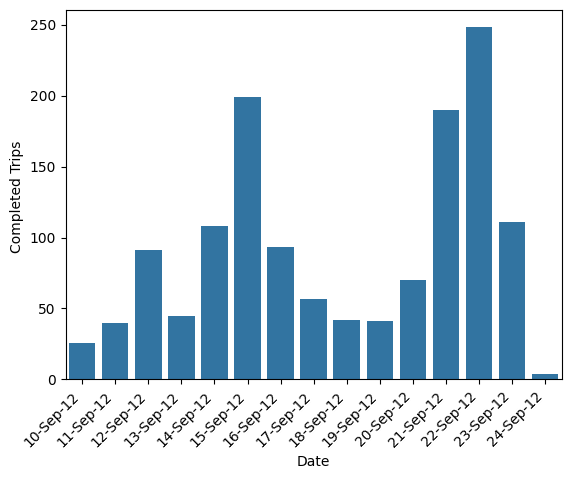

In [7]:
# Visualizando esses dados
sns.barplot(data=df_agg_date, x='Date', y='Completed Trips ')
plt.xticks(rotation=45, ha='right')
plt.show()

### Pergunta 2
Qual foi o maior número de viagens concluídas em um período de 24 horas?

In [8]:
# Observe que ele não quer a data e sim um recorte de 24 horas

# Criando nova coluna, coluna de Timestamp
df_timestamp = df
df_timestamp['Timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time (Local)'].astype(str), format='%d-%b-%y %H')
# Indexando o Timestamp
df_timestamp_indexed = df.set_index('Timestamp')
# Criando agg com Completed Trips
df_agg_24h = df_timestamp_indexed['Completed Trips '].rolling('24h').sum()
# Conseguindo valor max
df_agg_24h.max()

278.0

### Pergunta 3
Qual hora do dia teve mais pedidos durante o período de duas semanas?

In [9]:
df_agg_time = df.groupby('Time (Local)').sum(numeric_only = True).reset_index()
df_agg_time.nlargest(1,'Requests ')

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
23,23,488,193,126,184,119


### Pergunta 4
Que porcentagens de todos que não viram nenhum carro durante o período de duas semanas ocorreram no fim de semana (sexta-feira às 17h a domingo às 3h)?

In [10]:
# Total de Zeroes
total_zeroes = df['Zeroes '].sum()
total_zeroes

np.int64(1429)

In [11]:
# Inserindo o dia da semana no df
df['Day'] = pd.to_datetime(df['Date'], format='%d-%b-%y').dt.day_name()
# Filtrando os finais de semana
zeroes_fds = df[
                ((df['Day']=='Friday') & (df['Time (Local)'] >= 17)) |
                (df['Day'] == 'Saturday') |
                (df['Day']=='Sunday') & (df['Time (Local)'] <= 3)
               ]
# Total de Zeroes no final de semana
zeroes_fds['Zeroes '].sum()

np.int64(644)

In [12]:
# Porcentagem
print(zeroes_fds['Zeroes '].sum() / total_zeroes * 100, '%')

45.066480055983206 %


### Pergunta 5
Qual é a proporção média ponderada de viagens concluídas por motorista durante o período de duas semanas?

In [13]:
# Evitando divisões por zero
df_driver_not_null = df[(df['Unique Drivers'] > 0)]
# Fazendo a média com o peso
df_media = df_driver_not_null['Completed Trips ']**2 / df_driver_not_null['Unique Drivers']
# Media ponderada
df_media.sum() / df_driver_not_null['Completed Trips '].sum()

np.float64(0.8282775715092395)

### Pergunta 6
Ao elaborar um cronograma de motorista em termos de turnos de 8 horas, quando são as 8 horas consecutivas mais ocupadas no período de duas semanas em termos de solicitações únicas? Um novo turno começa a cada 8 horas. Suponha que um motorista trabalhe no mesmo turno todos os dias.

In [14]:
# Indexando o Timestamp
df_timestamp_indexed = df.set_index('Timestamp')
# Criando agg com Completed Trips
df_agg_8h = df_timestamp_indexed.resample('8h').sum(numeric_only = True)
# Conseguindo valor max
# df_agg_8h.sort_values('Requests ', ascending=False).head()
df_agg_8h.nlargest(1,'Requests ')['Requests ']

,Requests
Timestamp,
2012-09-21 16:00:00,192


### Pergunta 7
Verdadeiro ou falso : A oferta de motorista sempre aumenta quando a demanda aumenta durante o período de duas semanas.
sns.regplot(data = df, x = 'Requests ', y = 'Unique Drivers')

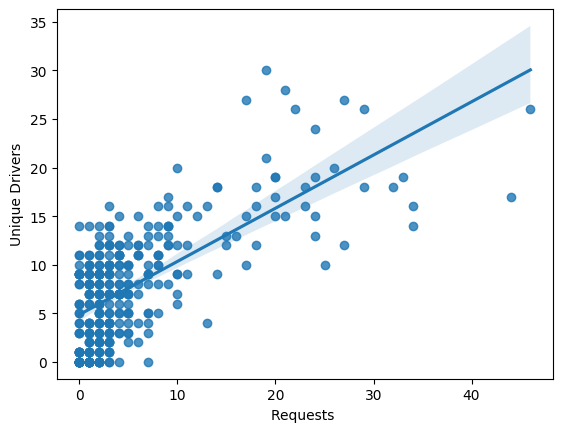

In [15]:
sns.regplot(data=df, x='Requests ', y='Unique Drivers')
plt.show()

Apesar de, em média, a afirmação acontecer, nem sempre isso acontece! Há momentos que a demanda é grande mas há um baixo número de motoristas.

In [95]:
# provando isso estatisticamente e computacionalmente

# criar df vazio com apenas timestamps
diferenca_df = pd.DataFrame(df['Timestamp'])
diferenca_df['request_diff'] = df['Requests '].shift(-1) - df['Requests ']
diferenca_df['supply_diff'] = df['Unique Drivers'].shift(-1) - df['Unique Drivers']

# verificando se a demanda aumenta de acordo com a oferta
(diferenca_df[diferenca_df['request_diff']>0]['supply_diff']>0).all().item()

False

### Pergunta 8
Em qual período de 72 horas a proporção de pessoas que não viram nenhum carro para as pessoas que abriram o aplicativo é a mais alta?

In [17]:
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Timestamp,Day
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00,Monday
1,10-Sep-12,8,6,0,2,2,14,2012-09-10 08:00:00,Monday
2,10-Sep-12,9,8,3,0,0,14,2012-09-10 09:00:00,Monday
3,10-Sep-12,10,9,2,0,1,14,2012-09-10 10:00:00,Monday
4,10-Sep-12,11,11,1,4,4,11,2012-09-10 11:00:00,Monday
...,...,...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0,2012-09-24 02:00:00,Monday
332,24-Sep-12,3,3,3,0,1,0,2012-09-24 03:00:00,Monday
333,24-Sep-12,4,1,1,0,0,0,2012-09-24 04:00:00,Monday
334,24-Sep-12,5,4,2,1,1,3,2012-09-24 05:00:00,Monday


In [18]:
df_zeroes_prop_eyballs = df.set_index('Timestamp').sort_index()
rolling_zeroes = df_zeroes_prop_eyballs['Zeroes '].rolling('72h').sum()
rolling_eyeballs = df_zeroes_prop_eyballs['Eyeballs '].rolling('72h').sum()
df_zeroes_prop_eyballs['prop_72h'] = rolling_zeroes / rolling_eyeballs
df_zeroes_prop_eyballs['prop_72h'].max()

0.2929765886287625

### Pergunta 9
Se você pudesse adicionar 5 motoristas a qualquer hora de cada dia durante o período de duas semanas, a qual hora você deveria adicioná-los?

In [32]:
df_agg_time = df.groupby('Time (Local)').sum(numeric_only = True).reset_index()
df_agg_time['unique_per_eyeballs'] = df_agg_time['Eyeballs '] / df_agg_time['Unique Drivers']
df_agg_time.sort_values('unique_per_eyeballs', ascending=False).head(1)

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,unique_per_eyeballs
23,23,488,193,126,184,119,4.10084


### Pergunta 10
Verdadeiro ou falso: há exatamente duas semanas de dados nesta análise

In [65]:
# Verificando a diferença de tempo entre inicio e fim
(df['Timestamp'][df.shape[0] - 1]-df['Timestamp'][0])

Timedelta('13 days 23:00:00')

In [68]:
pd.Timedelta('14 days') == df['Timestamp'][df.shape[0] - 1]-df['Timestamp'][0]

False

In [69]:
pd.Timedelta('14 days') > df['Timestamp'][df.shape[0] - 1]-df['Timestamp'][0]

True

### Pergunta 11
Olhando para os dados de todas as duas semanas, qual horário pode fazer mais sentido considerar um verdadeiro "fim do dia" em vez da meia-noite? (ou seja, quando a oferta e a demanda estão em seus mínimos naturais)

In [82]:
df_oferta_min_por_dia = df.groupby(['Date'])['Unique Drivers'].min().reset_index().rename(columns={'Unique Drivers':'min_supply_per_day'})
df_demanda_min_por_dia = df.groupby(['Date'])['Requests '].min().reset_index().rename(columns={'Requests ':'min_demand_per_day'})

In [83]:
oferta_demanda = pd.merge(df_oferta_min_por_dia, df_demanda_min_por_dia, on='Date')
oferta_demanda

,Date,min_supply_per_day,min_demand_per_day
0,10-Sep-12,3,0
1,11-Sep-12,0,0
2,12-Sep-12,0,0
3,13-Sep-12,0,0
4,14-Sep-12,0,1
5,15-Sep-12,0,0
6,16-Sep-12,0,0
7,17-Sep-12,0,0
8,18-Sep-12,0,0
9,19-Sep-12,0,0


In [84]:
# Mesclando valores minmos encontrados com o conjunto de dados
dataset_w_oferta_demanda = pd.merge(df, oferta_demanda, on='Date')
dataset_w_oferta_demanda

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Timestamp,Day,min_supply_per_day,min_demand_per_day
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00,Monday,3,0
1,10-Sep-12,8,6,0,2,2,14,2012-09-10 08:00:00,Monday,3,0
2,10-Sep-12,9,8,3,0,0,14,2012-09-10 09:00:00,Monday,3,0
3,10-Sep-12,10,9,2,0,1,14,2012-09-10 10:00:00,Monday,3,0
4,10-Sep-12,11,11,1,4,4,11,2012-09-10 11:00:00,Monday,3,0
...,...,...,...,...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0,2012-09-24 02:00:00,Monday,0,0
332,24-Sep-12,3,3,3,0,1,0,2012-09-24 03:00:00,Monday,0,0
333,24-Sep-12,4,1,1,0,0,0,2012-09-24 04:00:00,Monday,0,0
334,24-Sep-12,5,4,2,1,1,3,2012-09-24 05:00:00,Monday,0,0


In [88]:
min_point = dataset_w_oferta_demanda[(dataset_w_oferta_demanda.min_supply_per_day == dataset_w_oferta_demanda['Unique Drivers']) & (dataset_w_oferta_demanda.min_supply_per_day == dataset_w_oferta_demanda['Requests '])]['Time (Local)'].mode()
min_point[0]
# A hora mínima é 4 da manhã

np.int64(4)

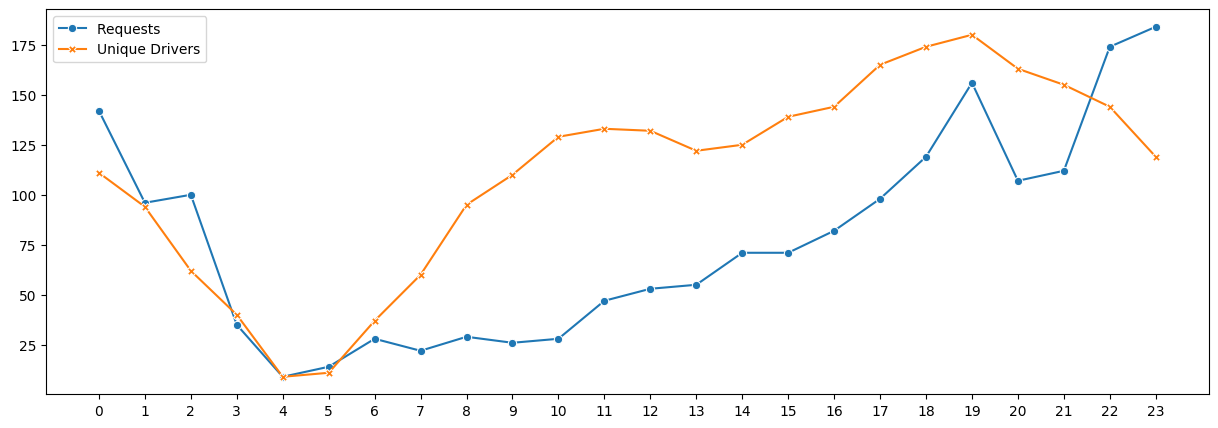

In [92]:
min_point_value = min_point[0]
plt.figure(figsize=(15,5))
sns.lineplot(data = df_agg_time[['Requests ', 'Unique Drivers']], markers=True, dashes=False).set_xticks(df_agg_time['Time (Local)'])
plt.show()